# DATA WRANGLING

By<br>
<a href="https://github.com/Obed-Makori">Makori Obed</a>


### ABOUT THE PROJECT.
<p>This is a project submitted to Udacity Learning courtesy of ALX Data Analysis Scholarship. The goal of this project is to gather, assess and store data. The three fore-stated objectives fall under data wrangling process. This project is therefore targeting data wrangling understanding.</p>

The data is gathered through web scraping method.<br>
The data is assessed both visually and programmatically.<br>
The data is stored for future modelling, and reference( for business decision making)<br>

In [1]:
#importing common data analysis libraries
import pandas as pd
import numpy as np
import requests
import tweepy 
import json 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#accesssing the first dataset from udacity 
url1="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"
twitter_archived_enhanced=pd.read_csv(url1)
#test
twitter_archived_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# extracting information about the dataset

twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The dataset has 17 features/columns<br>
Most of the features are of object type

In [4]:
#assing the second dataset
url2 = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url2)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
1848,839549326359670784,https://pbs.twimg.com/media/C6atpTLWYAIL7bU.jpg,1,swing,0.393527,False,Norwich_terrier,0.052480,True,Pembroke,0.049901,True
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False


In [5]:
# extracting information about the dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Scraping data from Twitter API 

In this section, we are going to scrape extra data that we will need in this data gathhering process, and the entire data analysis process.
To gather this data, we use Tweepy python library bto scrape data while targetting our feTURES OF INTEREST. For this case, we are going to querry each twet's retweetcount and favourite ("like") count. Finally, we shall store this data in a file named tweeet_json.txt 

In [6]:
# importing Tweepy library
import tweepy
import webbrowser 
import time
consumer_key = '2cJRi8AkyDT2Qd6nZDEsoe07L'
consumer_secret = '0NLbLJ1rpQ7zpZ7ZNoxm5asCHXqPYxoTfEqsMjgcsN2gBEwTtr'
access_token = '1067074859325423616-5qR8HAFNpcuN7jYySOWrnjsGrx5lLn'
access_secret = '6j0qgd4tHkDWE8ibOPBaMvEzKsA6uyDMaSrY0L3b9XWAJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archived_enhanced['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [8]:
# about the process
print("The the process gathered" ,len(list_of_tweets), " tweets")
#not found tweets
print(len(cant_find_tweets_for_those_ids), " Tweets were not found.")


The the process gathered 872  tweets
1484  Tweets were not found.


In [9]:
tweet_ids = list(twitter_archived_enhanced.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 877611172832227328
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 872261713294495745
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 856602993587888130
Error for: 856330835276025856
Error for: 851953902622658560
Error for: 851861385021730816
Error for: 845459076796616705
Error for: 844704788403113984
Error for: 842892208864923648
Error for: 837366284874571778
Error for: 837012587749474308
Error for: 829374341691346946
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 779123168116150273
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968
Error for: 766864461642756096
Error for: 759923798737051648
Error for: 759566828574212096


Error for: 754011816964026368
Error for: 680055455951884288


In [10]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [11]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(2)

,tweet_id,retweets,favorites
1782,676811746707918848,377,1301
1136,722974582966214656,1426,3748


# DATA ASSESSMENT

In this section, we assess the three gathered datasets for both tidiness and quality issues.
The assessment is done in two sub-sections
1. Visual Assessment

2. Programmatic assessment

The assessment is also done for the three datasets;<br>
tweets_df<br>
twitter_archived_enhanced<br>
image_prediction



## Visual Assessment
### twitter_archived_enhanced

In [12]:
twitter_archived_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Image Predictions Data

In [13]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Twitter_Df

In [14]:
tweets_df

,tweet_id,retweets,favorites
0,892420643555336193,6953,33639
1,892177421306343426,5259,29177
2,891815181378084864,3462,21945
3,891689557279858688,7174,36719
4,891327558926688256,7704,35116
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


## Programmatic Assessment

### twitter_archived_enhanced

In [15]:
twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
#statistical summary
twitter_archived_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archived_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
twitter_archived_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
twitter_archived_enhanced.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

##   Data Cleaning

In [20]:
archive_clean =twitter_archived_enhanced.copy()
tweets_clean = tweets_df.copy()
img_pred_clean = image_prediction.copy()


In [21]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
img_pred_clean.tweet_id = img_pred_clean.tweet_id.astype(str)
archive_clean = pd.merge(archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_pred_clean,
                        how = 'inner', on = 'tweet_id')

In [22]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         70 non-null     float64
 7   retweeted_status_user_id    70 non-null     float64
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  doggo                       2056 

In [23]:
archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
archive_clean[archive_clean.retweets.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


Define: dog categories hide category variable (archive_df)

Code: Melt dog stage columns into single column.

In [25]:
archive_clean = pd.melt(archive_clean,
                        id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
                                 'timestamp', 'source', 'text', 'retweeted_status_id',
                                 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                 'name', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
                                 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
                                 'p3_dog'],
                        value_name='dog_stage')
archive_clean = archive_clean.drop('variable', axis=1)

#testing
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1711,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570...,...,Irish_terrier,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True,None
3987,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,...,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True,None
8098,668248472370458624,NaN,NaN,2015-11-22 02:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bisquick. He is a Brown Douglass ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668248472...,...,Chihuahua,0.734547,True,miniature_pinscher,0.068294,True,toy_terrier,0.046367,True,None


In [26]:
len(archive_clean[archive_clean.dog_stage != 'None'])

330

In [27]:
#
archive_clean.dog_stage.value_counts()

None       7894
pupper      220
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [28]:
# Keep one of 3 duplicates with 'None'
dup_df1 = archive_clean.drop_duplicates(subset=['tweet_id', 'dog_stage']) 
dup_df1 = archive_clean.drop_duplicates()

# Keep rows with dog stage
dup_pos = archive_clean.duplicated(subset='tweet_id', keep = False)
dup_df2 = archive_clean[dup_pos]
dup_df2 = dup_df2[dup_df2.dog_stage != 'None']

# Combine
dup_df1 = dup_df1.drop_duplicates(subset = 'tweet_id', keep = False)
dup_df_merged = dup_df1.append(dup_df2)

Define: Duplicate tweets from multiple dog stages.

Code: Multiple stages appear in 14 tweets. Change dog_stage to multiple, drop duplicates. Remove drop duplicates from archive_clean based on tweet_id, then append multiple rows.

In [29]:
remaining_dup_df = dup_df_merged[dup_df_merged.duplicated(subset='tweet_id', keep=False)]
remaining_dup_df[remaining_dup_df.tweet_id == '817777686764523521']

remaining_dup_df.dog_stage = 'multiple'
dup_drops = remaining_dup_df.drop_duplicates()
dup_drops[dup_drops.tweet_id == '817777686764523521']

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
355,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,curly-coated_retriever,0.733256,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,multiple


In [30]:
duped_ids = set(remaining_dup_df.tweet_id)
for idx in dup_df_merged.tweet_id:
    if idx in duped_ids:
        dup_df_merged.dog_stage[dup_df_merged.tweet_id == idx] = 'multiple'
archive_clean = dup_df_merged.drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
#testing
archive_clean.dog_stage.value_counts()

None        1739
pupper       209
doggo         65
puppo         23
multiple      13
floofer        7
Name: dog_stage, dtype: int64

Define: Convert float variables (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) to object.

Code: Convert tweet_id to string

In [32]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

#testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 7041
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   object 
 1   in_reply_to_status_id       2056 non-null   object 
 2   in_reply_to_user_id         2056 non-null   object 
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         2056 non-null   object 
 7   retweeted_status_user_id    2056 non-null   object 
 8   retweeted_status_timestamp  70 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  retweets                    2056 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Define: Convert object variables (timestamp and retweeted_status_timestamp) to datetime.

Code: Convert timestamp to datetime object.

In [33]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 7041
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2056 non-null   object             
 1   in_reply_to_status_id       2056 non-null   object             
 2   in_reply_to_user_id         2056 non-null   object             
 3   timestamp                   2056 non-null   datetime64[ns, UTC]
 4   source                      2056 non-null   object             
 5   text                        2056 non-null   object             
 6   retweeted_status_id         2056 non-null   object             
 7   retweeted_status_user_id    2056 non-null   object             
 8   retweeted_status_timestamp  70 non-null     datetime64[ns, UTC]
 9   expanded_urls               2056 non-null   object             
 10  rating_numerator            2056 non-null   int64           

In [42]:
archive_clean.drop("retweeted_status_timestamp", axis=1, inplace=True)
archive_clean.isna().sum()

KeyError: ignored

### DATA STORAGE

In [49]:
archive_clean.to_csv('twitter_archive_f.csv', encoding='utf-8', index=False)

#DATA Cleaning

In [50]:
#reading the dataset into a pandas dataframe

data=pd.read_csv("twitter_archive_f.csv")

data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [45]:
data.shape


(2056, 26)

The final dataset contains 2056 rows and 26 columns

In [51]:
data.name.value_counts()[:10]

None       570
a           55
Penny       10
Cooper      10
Tucker      10
Oliver      10
Charlie     10
Lucy         9
Bo           8
Sadie        8
Name: name, dtype: int64

In [48]:
#relecting on meaningful but inconsistent numerators and denominators
archive_clean.rating_denominator.value_counts()

10     2038
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

Definition: dog categories are str (archive_df)

Code: convert dog_stage to categorical type

In [52]:
data.dog_stage = archive_clean.dog_stage.astype('category')

Definition retweets and favorites are float

Code: Fill NaNs with median values.

In [53]:
median_retweet = np.median(data.retweets.dropna())
median_favorite = np.median(data.favorites.dropna())
print(median_retweet, median_favorite)


1107.0 3236.0


In [55]:
#imputing
data.retweets = data.retweets.fillna(median_retweet).astype('int64')
data.favorites = data.favorites.fillna(median_favorite).astype('int64')

#testing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   tweet_id                  2056 non-null   int64   
 1   in_reply_to_status_id     23 non-null     float64 
 2   in_reply_to_user_id       23 non-null     float64 
 3   timestamp                 2056 non-null   object  
 4   source                    2056 non-null   object  
 5   text                      2056 non-null   object  
 6   retweeted_status_id       70 non-null     float64 
 7   retweeted_status_user_id  70 non-null     float64 
 8   expanded_urls             2056 non-null   object  
 9   rating_numerator          2056 non-null   int64   
 10  rating_denominator        2056 non-null   int64   
 11  name                      2056 non-null   object  
 12  retweets                  2056 non-null   int64   
 13  favorites                 2056 non-null   int64 

Definition: names from accessible text that were mistakenly identified

Code: whenever possible, substitute names for the words.

In [56]:
data.text[data.name =='a']
data.text[data.name =='an']
data.text[data.name =='my']
data.text[data.name =='his']

1805    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [58]:
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,752519690950500352,NaN,NaN,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,...,swing,0.999984,False,Labrador_retriever,0.000010,True,Eskimo_dog,0.000001,True,None
2052,751132876104687617,NaN,NaN,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,...,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True,None
2053,744995568523612160,NaN,NaN,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,...,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,None
2054,743253157753532416,NaN,NaN,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,...,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True,None


### Data Storage

In [59]:
data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [60]:
# from google.colab import files 
# files.download('twitter_archive_master.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data Analysis

This analysis is targeting to answer the question, How do retweets and favorites interact with one another?

In [62]:
#reading the dataset into a pandas dataframe
df=pd.read_csv("twitter_archive_master.csv")

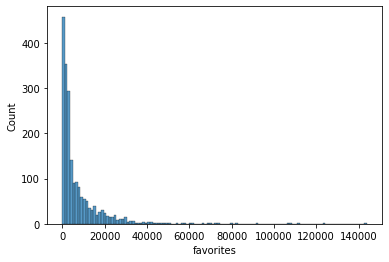

In [65]:
sns.histplot(df.favorites, label = 'Favorites')

plt.show()

It is clear that most favourite accounts among the tweets lie between o and 20000.

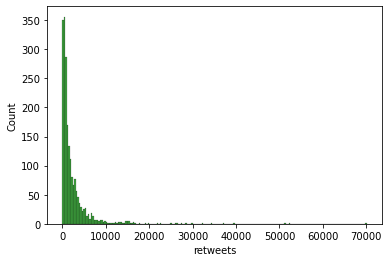

In [67]:
#analyzzing on retweeets obtained
sns.histplot(df.retweets, color="green",label = 'Retweets')

plt.show()

It is clear that most retweetslies between between o and 10000.

In [70]:
### Analyzing the correlation between favourite counts and retweets

corr = df.corr()
corr.style.background_gradient(cmap='ocean')


/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweets,favorites,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.685117,nan,0.728093,0.230578,0.023116,-0.024033,0.389826,0.575617,0.207751,0.103878,0.114543,0.002943,0.114238,-0.043057,0.088753
in_reply_to_status_id,0.685117,1.000000,nan,nan,nan,-0.078811,-0.067949,0.173417,0.608637,0.076881,0.425057,-0.079810,-0.392543,-0.210564,-0.341782,0.133557
in_reply_to_user_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweeted_status_id,0.728093,nan,nan,1.000000,0.225158,0.406690,nan,0.043329,nan,0.062548,0.077489,-0.053128,-0.005622,-0.144032,-0.028117,-0.186855
retweeted_status_user_id,0.230578,nan,nan,0.225158,1.000000,0.107357,nan,-0.122545,nan,-0.044855,-0.129782,0.078811,0.079434,0.073480,0.115380,0.084215
rating_numerator,0.023116,-0.078811,nan,0.406690,0.107357,1.000000,0.198248,0.017685,0.016103,-0.000430,-0.009075,-0.028583,-0.020492,-0.033940,-0.003967,-0.028643
rating_denominator,-0.024033,-0.067949,nan,nan,nan,0.198248,1.000000,-0.021383,-0.025252,-0.004162,-0.004304,0.001019,-0.034655,-0.000498,0.006732,0.005072
retweets,0.389826,0.173417,nan,0.043329,-0.122545,0.017685,-0.021383,1.000000,0.860946,0.105835,0.043773,0.002824,-0.004635,0.015229,-0.031729,0.000976
favorites,0.575617,0.608637,nan,nan,nan,0.016103,-0.025252,0.860946,1.000000,0.125007,0.067184,0.044330,-0.017904,0.052313,-0.046874,0.036230
img_num,0.207751,0.076881,nan,0.062548,-0.044855,-0.000430,-0.004162,0.105835,0.125007,1.000000,0.203919,0.027314,-0.160407,0.047001,-0.139333,0.059086
